<a href="https://colab.research.google.com/github/hamzatayel/Hamza-Tayel-s-Repository/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hamza Tayel

ID: 58-1702

Tutorial: 02

---

Name: Hazem Mowafi  

ID: 58-0930

Tutorial: 02

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [184]:
df.describe()

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


In [185]:
df.shape

(1100, 11)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [187]:
df['Building_Type'].value_counts()

,count
Building_Type,
Residential,349
Commercial,325
Industrial,316


In [188]:
df['Building_Type'].unique()

array(['Residential', 'Commercial', 'Industrial', nan], dtype=object)

In [189]:
df['Governorate'].unique()

array(['Alexandria', 'Giza', 'Cairo', nan], dtype=object)

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [190]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


handling missing values in building type column

In [191]:
df['Building_Type'].fillna('Unknown', inplace=True)
df.head()


/tmp/ipython-input-949581279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Building_Type'].fillna('Unknown', inplace=True)


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


handling missing values in governorate column

In [192]:
df['Governorate'].fillna('Unknown', inplace=True)
df.head()

/tmp/ipython-input-1524659230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Governorate'].fillna('Unknown', inplace=True)


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


removing symbols and numbers from the neighborhood column

In [193]:
import re

df['Neighborhood'] = (
    df['Neighborhood']
    .astype(str)                                  # typecasting into strings
    .str.strip()                                  # remove extra spaces bedore and after
    .str.replace(r'[^A-Za-z\s]', '', regex=True)  # remove numbers and symbols
    .str.replace(r'\s+', ' ', regex=True)         # ensure only one soace between words
)


In [194]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


In [195]:
df['Neighborhood'].unique()

array(['Smouha', 'Mohandessin', 'New Cairo', 'Dokki', 'Heliopolis',
       'Gleem', 'Maadi'], dtype=object)

day of week proper capitalization

In [196]:
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


day of week normalization into numericencoding

In [197]:
DOW_map = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}
df['Day_of_Week'] = df['Day_of_Week'].map(DOW_map)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


occupancy level and appliance usage level normalization into numeric for linear regression

In [198]:
occupancy_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Occupancy_Level'] = df['Occupancy_Level'].map(occupancy_map)
appliances_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Appliances_Usage_Level'] = df['Appliances_Usage_Level'].map(appliances_map)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.82,3279.17 kWh


square footage column cleaning

In [199]:
df.tail(10)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
1090,BLD-2090-LV,Residential,Unknown,Gleem,2,1,1,31178,2023-09-08,30.62,3451.58 kWh
1091,BLD-2091-XH,Residential,Alexandria,Gleem,1,3,1,33642,2020-01-01,34.03,3977.63 kWh
1092,BLD-2092-OT,Residential,Unknown,Heliopolis,4,3,1,34160,2024-01-16,36.56,3830.68 kWh
1093,BLD-2093-JY,Unknown,Giza,Mohandessin,7,3,3,2091m2,2024-11-10,36.12,4250.29 kWh
1094,BLD-2094-XZ,Industrial,Cairo,New Cairo,7,1,1,30211,2023-08-27,38.48,4137.66 kWh
1095,BLD-2095-OH,Commercial,Giza,Dokki,7,3,1,1161m2,2022-04-21,27.85,3010.81 kWh
1096,BLD-2096-RH,Residential,Unknown,Dokki,1,2,2,37943m2,2024-10-31,36.23,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,1,1,2,1558,2021-04-18,20.00,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,7,2,1,2145,2023-09-14,34.43,3348.39 kWh
1099,BLD-2099-GL,Residential,Cairo,New Cairo,6,3,2,42414,2020-12-09,40.37,4722.59 kWh


In [200]:
df['SquareFootage'].isnull().sum()

np.int64(0)

In [201]:
df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace('m2', '', regex=False) #turning to string to remove m2 and keep numbers only
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.82,3279.17 kWh


In [202]:
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce') # turning back to numeric


In [203]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.82,3279.17 kWh


feature engineering last maintenance date to create another feature called days since last maintenance

In [204]:
from datetime import datetime
today = pd.Timestamp(datetime.today().date()) # getting today actual date
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce') # transforming the column into datetime
df['Days_Since_Last_Maintenance'] = (today - df['Last_Maintenance_Date']).dt.days # finding the difference in days
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063,2020-01-01,28.61,2713.95 kWh,2121
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372,2022-02-24,NaN,5744.99 kWh,1336
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.88,4101.24 kWh,1703
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.06,3009.14 kWh,815
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.82,3279.17 kWh,1167


average temp column cleaning

In [205]:
df['Average_Temperature'].isnull().sum()

np.int64(110)

In [206]:
print(df['Average_Temperature'].max())
print(df['Average_Temperature'].min())
print(df['Average_Temperature'].mean())
print(df['Average_Temperature'].median())

50.0
-4.91
33.499404040404045
35.26


In [207]:
df['Average_Temperature'].fillna(df['Average_Temperature'].mean(), inplace=True)
df['Average_Temperature'].isnull().sum()

/tmp/ipython-input-2621881463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average_Temperature'].fillna(df['Average_Temperature'].mean(), inplace=True)


np.int64(0)

In [208]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063,2020-01-01,28.610000,2713.95 kWh,2121
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372,2022-02-24,33.499404,5744.99 kWh,1336
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.880000,4101.24 kWh,1703
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.060000,3009.14 kWh,815
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.820000,3279.17 kWh,1167


feature engineering a new column called day type

In [209]:
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance,Day_Type
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063,2020-01-01,28.610000,2713.95 kWh,2121,Weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372,2022-02-24,33.499404,5744.99 kWh,1336,Weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.880000,4101.24 kWh,1703,Weekday
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.060000,3009.14 kWh,815,Weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.820000,3279.17 kWh,1167,Weekday


energy consumption cleaning

In [210]:
df['Energy_Consumption'].isnull().sum()

np.int64(0)

In [211]:
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', regex=False)
df['Energy_Consumption'] = df['Energy_Consumption'].str.strip()
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance,Day_Type
0,BLD-1000-UD,Residential,Alexandria,Smouha,4,3,1,7063,2020-01-01,28.610000,2713.95,2121,Weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,3,3,3,44372,2022-02-24,33.499404,5744.99,1336,Weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,1,2,1,19255,2021-02-22,37.880000,4101.24,1703,Weekday
3,BLD-1003-HE,Unknown,Unknown,Dokki,3,1,3,13265,2023-07-30,35.060000,3009.14,815,Weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,2,1,1,13375,2022-08-12,28.820000,3279.17,1167,Weekday


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the

*   List item
*   List item

graph (mention top 3)

**Visualization**

In [212]:
# Count occurrences of each neighborhood
neighborhood_counts = df['Neighborhood'].value_counts()
neighborhood_counts


,count
Neighborhood,
Smouha,199
Dokki,194
Gleem,189
Mohandessin,169
New Cairo,144
Maadi,110
Heliopolis,95


/tmp/ipython-input-2304400819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')


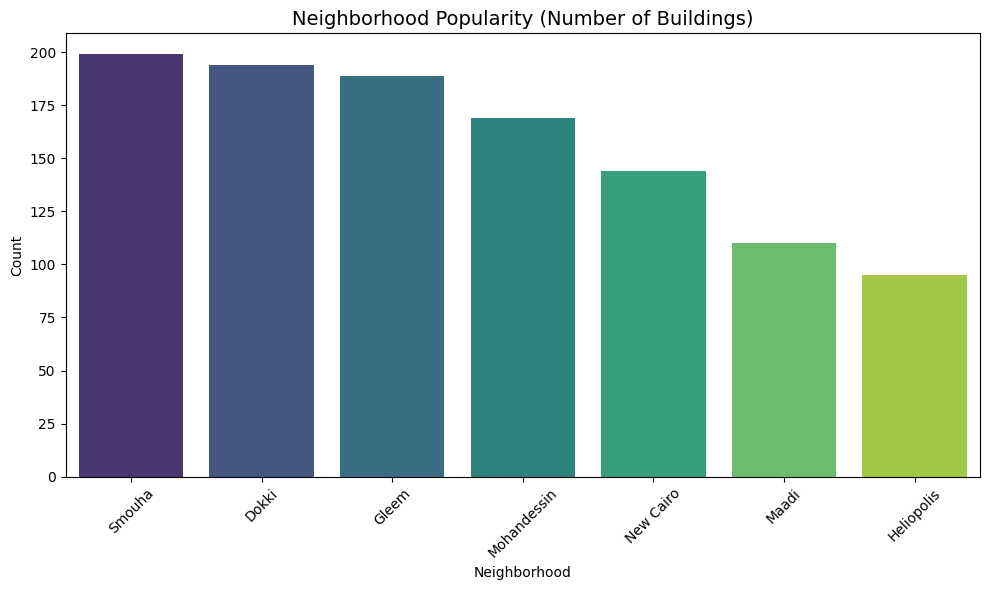

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Neighborhood Popularity (Number of Buildings)', fontsize=14)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [214]:
top3 = neighborhood_counts.head(3)
print("Top 3 Most Popular Neighborhoods:")
print(top3)


Top 3 Most Popular Neighborhoods:
Neighborhood
Smouha    199
Dokki     194
Gleem     189
Name: count, dtype: int64


**Answer for Q1:** Top 3 are Smouha, Dokki, and Gleem

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

/tmp/ipython-input-2395238913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Building_Type', y='Energy_Consumption', palette='muted', inner='box')


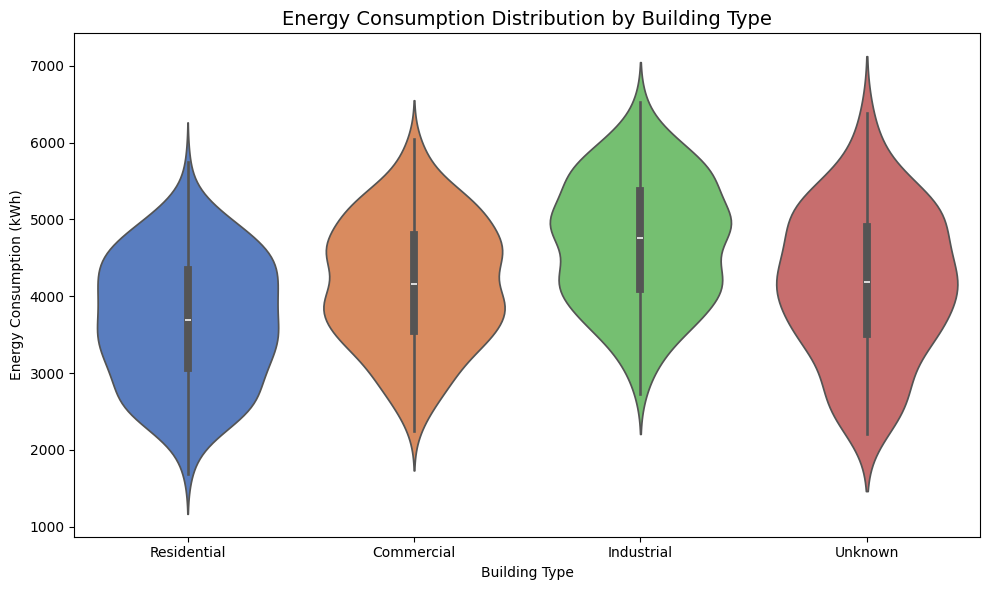

In [215]:


plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Building_Type', y='Energy_Consumption', palette='muted', inner='box')
plt.title('Energy Consumption Distribution by Building Type', fontsize=14)
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption (kWh)')
plt.tight_layout()
plt.show()


In [216]:
summary = df.groupby('Building_Type')['Energy_Consumption'].agg(['mean', 'std', 'min', 'max'])
summary.sort_values('mean', ascending=False)


,mean,std,min,max
Building_Type,,,,
Industrial,4708.418671,818.158005,2724.82,6530.60
Commercial,4170.374462,809.695114,2241.96,6042.56
Unknown,4160.626091,949.703360,2205.20,6383.50
Residential,3679.396934,833.337177,1683.95,5746.40


**Answer for Q2:** Industrial buildings display the widest distribution, meaning their energy use varies greatly between facilities. On average, Industrial buildings also have the highest energy consumption, followed by Commercial, then Residential buildings

**Q3:** How does the building size affect energy consumption?

**Visualization**

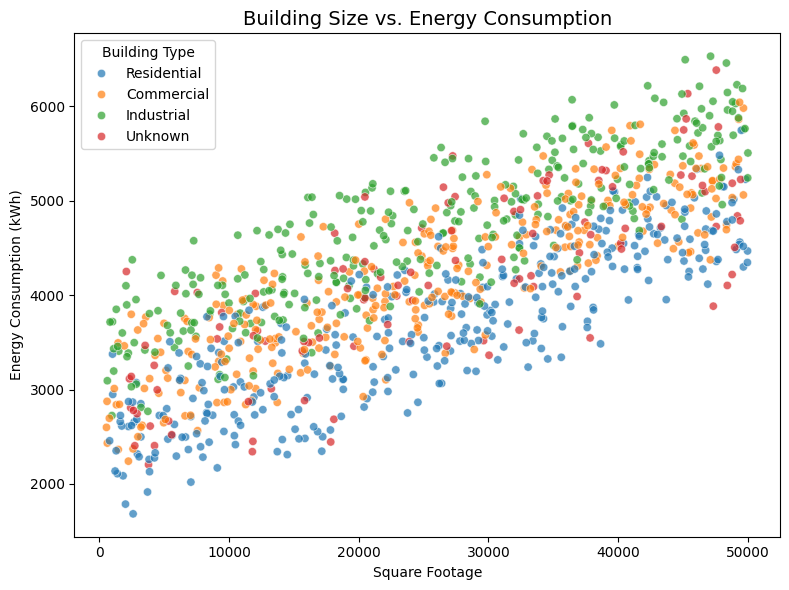

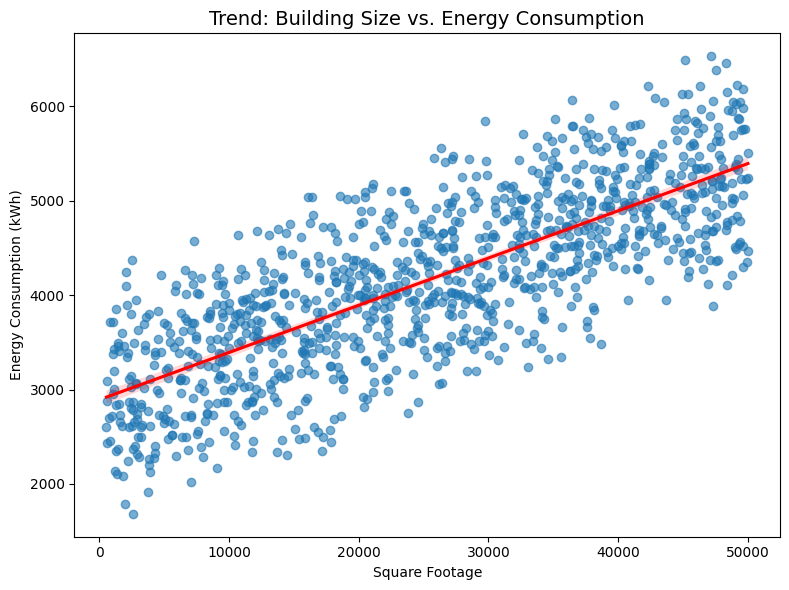

In [217]:


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SquareFootage', y='Energy_Consumption', hue='Building_Type', alpha=0.7)
plt.title('Building Size vs. Energy Consumption', fontsize=14)
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Building Type')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='SquareFootage', y='Energy_Consumption', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Trend: Building Size vs. Energy Consumption', fontsize=14)
plt.xlabel('Square Footage')
plt.ylabel('Energy Consumption (kWh)')
plt.tight_layout()
plt.show()


In [218]:
corr = df['SquareFootage'].corr(df['Energy_Consumption'])
corr


np.float64(0.7707645406507827)

**Answer for Q3:** corr 0.77 shows a positive correlation, not weak and not too strong, so it is a medium strong positive correlation, meaning that when the square footage increases, increasing building size, the consumption increases.

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

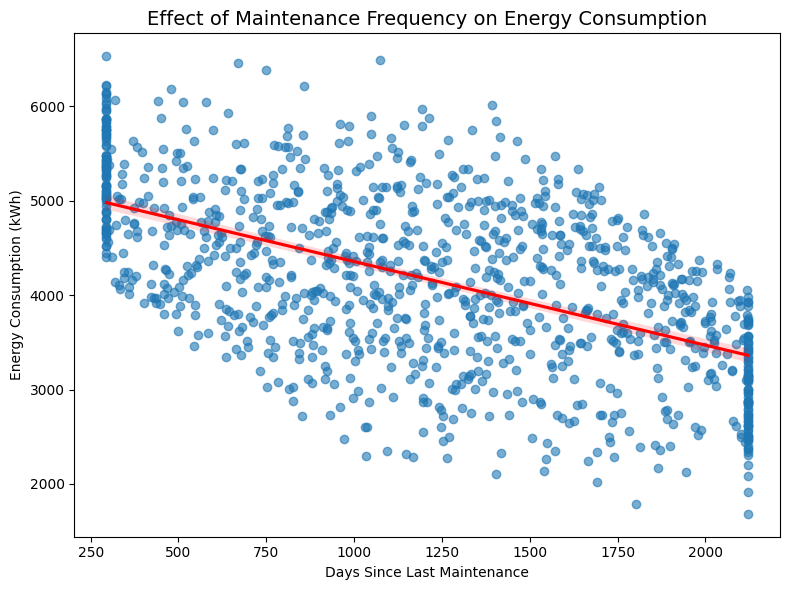

In [219]:


plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='Days_Since_Last_Maintenance',
    y='Energy_Consumption',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Effect of Maintenance Frequency on Energy Consumption', fontsize=14)
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption (kWh)')
plt.tight_layout()
plt.show()


In [220]:
corr = df['Days_Since_Last_Maintenance'].corr(df['Energy_Consumption'])
corr


np.float64(-0.5514041436111478)

**Answer for Q4:** there is a medium negative correlation between both variables.

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

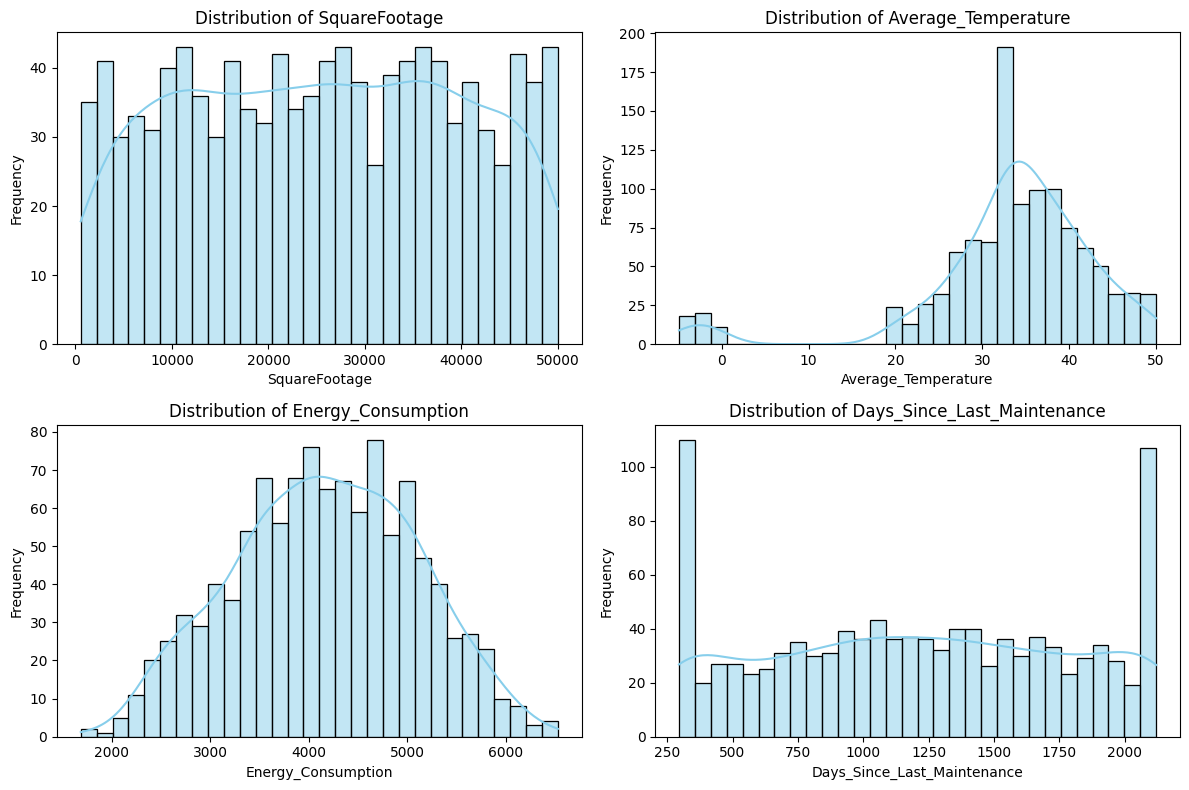

In [221]:
numm_cols = [
    'SquareFootage',
    'Average_Temperature',
    'Energy_Consumption',
    'Days_Since_Last_Maintenance'
]


plt.figure(figsize=(12,8))

for i, col in enumerate(numm_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [222]:
df[numm_cols].skew()


,0
SquareFootage,-0.009364
Average_Temperature,-1.795635
Energy_Consumption,-0.060156
Days_Since_Last_Maintenance,-0.016633


**Answer for Q5:** all numeric attributes are approximately normal, but average temperature is skewed to the left

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

Normalizing average temperature, days since last maintenance, and square footage

In [223]:
building_type_map = {
    'Residential': 1,
    'Commercial': 2,
    'Industrial': 3,
    'Unknown': 0   # or np.nan if you prefer
}

df['Building_Type'] = df['Building_Type'].map(building_type_map)


In [224]:
gov_map = {
    'Cairo': 1,
    'Giza': 2,
    'Alexandria': 3,
    'Unknown': 0
}

df['Governorate'] = df['Governorate'].map(gov_map)


In [225]:
neighborhood_map = {
    'Smouha': 1,
    'Gleem': 2,
    'Mohandessin': 3,
    'New Cairo': 4,
    'Heliopolis': 5,
    'Dokki': 6,
    'Maadi': 7
}

df['Neighborhood'] = df['Neighborhood'].map(neighborhood_map)


In [226]:
daytype_map = {
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 1,
    7: 1
}

df['Day_Type'] = df['Day_of_Week'].map(daytype_map)
df.head(15)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance,Day_Type
0,BLD-1000-UD,1,3,1,4,3,1,7063,2020-01-01,28.610000,2713.95,2121,0
1,BLD-1001-AX,2,2,3,3,3,3,44372,2022-02-24,33.499404,5744.99,1336,0
2,BLD-1002-IH,3,1,4,1,2,1,19255,2021-02-22,37.880000,4101.24,1703,0
3,BLD-1003-HE,0,0,6,3,1,3,13265,2023-07-30,35.060000,3009.14,815,0
4,BLD-1004-XD,2,3,1,2,1,1,13375,2022-08-12,28.820000,3279.17,1167,0
5,BLD-1005-VX,2,0,4,1,1,2,37377,2022-07-31,37.540000,4687.67,1179,0
6,BLD-1006-RC,3,1,5,7,3,1,38638,2023-07-07,50.000000,5526.83,838,1
7,BLD-1007-SN,1,1,4,3,2,1,34950,2020-07-29,38.510000,4116.32,1911,0
8,BLD-1008-BA,3,3,2,2,3,3,29741,2024-12-31,43.620000,5841.65,295,0
9,BLD-1009-CG,1,0,3,6,2,3,17467,2023-01-14,33.180000,3419.13,1012,1


In [227]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Average_Temperature', 'SquareFootage', 'Days_Since_Last_Maintenance']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [228]:
df_copy = df.copy()
y = df_copy["Energy_Consumption"]
X = df_copy.drop(["Energy_Consumption", "Building_ID", "Last_Maintenance_Date"], axis=1)


In [229]:
X.isnull().sum()

,0
Building_Type,0
Governorate,0
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Average_Temperature,0
Days_Since_Last_Maintenance,0
Day_Type,0


In [230]:
df_copy.head(20)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance,Day_Type
0,BLD-1000-UD,1,3,1,4,3,1,-1.295636,2020-01-01,-0.481744,2713.95,1.579984,0
1,BLD-1001-AX,2,2,3,3,3,3,1.326130,2022-02-24,0.000000,5744.99,0.215619,0
2,BLD-1002-IH,3,1,4,1,2,1,-0.438884,2021-02-22,0.431612,4101.24,0.853481,0
3,BLD-1003-HE,0,0,6,3,1,3,-0.859811,2023-07-30,0.153763,3009.14,-0.689903,0
4,BLD-1004-XD,2,3,1,2,1,1,-0.852081,2022-08-12,-0.461053,3279.17,-0.078111,0
5,BLD-1005-VX,2,0,4,1,1,2,0.834580,2022-07-31,0.398112,4687.67,-0.057254,0
6,BLD-1006-RC,3,1,5,7,3,1,0.923192,2023-07-07,1.625772,5526.83,-0.649928,1
7,BLD-1007-SN,1,1,4,3,2,1,0.664030,2020-07-29,0.493684,4116.32,1.214995,0
8,BLD-1008-BA,3,3,2,2,3,3,0.297985,2024-12-31,0.997163,5841.65,-1.593686,0
9,BLD-1009-CG,1,0,3,6,2,3,-0.564529,2023-01-14,-0.031470,3419.13,-0.347508,1


## Modelling

_Apply the linear regression model below._

In [231]:
df_copy.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Days_Since_Last_Maintenance,Day_Type
0,BLD-1000-UD,1,3,1,4,3,1,-1.295636,2020-01-01,-0.481744,2713.95,1.579984,0
1,BLD-1001-AX,2,2,3,3,3,3,1.326130,2022-02-24,0.000000,5744.99,0.215619,0
2,BLD-1002-IH,3,1,4,1,2,1,-0.438884,2021-02-22,0.431612,4101.24,0.853481,0
3,BLD-1003-HE,0,0,6,3,1,3,-0.859811,2023-07-30,0.153763,3009.14,-0.689903,0
4,BLD-1004-XD,2,3,1,2,1,1,-0.852081,2022-08-12,-0.461053,3279.17,-0.078111,0


In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

Evaluate the model you applied.

In [234]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 80112.8264246964
R-squared: 0.9058172258811563


In [235]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)


                       Feature  Coefficient
0                Building_Type   290.942493
1                  Governorate     4.799172
2                 Neighborhood    -1.748461
3                  Day_of_Week    15.636882
4              Occupancy_Level   315.102113
5       Appliances_Usage_Level   306.666833
6                SquareFootage   665.997115
7          Average_Temperature    40.335664
8  Days_Since_Last_Maintenance   -69.182517
9                     Day_Type   -83.964815


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.